### Student Information
Name: 陳彥榕

Student ID: 313612505

GitHub ID:  jungswork (Jonedowe)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [171]:
### Begin Assignment Here

In [172]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.Data Preparation

In [173]:
#匯入本題資料庫
stock_sentiment_data = pd.read_csv(r"C:\Users\user\Desktop\DM_Project\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv")

#檢視資料內容前 4 筆資料
stock_sentiment_data[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


In [174]:
#檢視目錄名稱(由於不是由scikit-learn索取資料，故不使用.target_names)
stock_sentiment_data.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

## reddit論壇資料說明，篩選出可能影響情緒指標的合適特徵
| 欄位 | 說明 | 篩選原因
|------|---------|------|
| **type** | 貼文類型（如:貼文、留言）| 與留言相比貼文通常提供較完整說明，可能影響情緒，故採用
| **datetime** | 日期 | <span style="color:red">雖財經事件發生的時間點可能影響群眾情緒，但 text 會提及財經事件，重疊性高(適度減少特徵避免過擬合)，故不採用</span>
| **post_id** | 發文人的名稱 | <span style="color:red">為作者網站名稱與情緒無關，不採用</span>
| **subreddit** | 子論壇名稱 | <span style="color:red">論壇名稱與情緒應只有微小關聯(如: 較大眾的論壇，不過在Reddict應不具有足夠權威的論壇)，不採用</span>
| **title** | 貼文標題 | 與情緒高度相關，故採用
| **author** | 作者 | 越有影響力的人發文越容易影響群眾情緒，故採用
| **url** | 網址 | <span style="color:red">與情緒指標無關，不採用</span>
| **upvotes** | 推文數 | 認同文章內容，故採用
| **downvotes** | 倒讚數 | <span style="color:red">倒讚表示不認同文章，判斷與不影響情緒，不採用</span>
| **upvote_ratio** | 推文比率 | <span style="color:red">認同文章內容，原採用，但因經過前處理發現空值過多，後續不採用</span>
| **text** | 內文 | 與情緒高度相關，故採用
| **subjectivity** | 貼文主觀指標 (0~1) | 與情緒高度相關，故採用
| **polarity** | 貼文理性指標 (-1~1) |與情緒高度相關，故採用
| **sentiment** | 情緒指標 (-1,0,1) | 本次資料探勘主要指標，故採用
| **entities** | 關鍵字 | <span style="color:red">與 text 及 title 重疊性高(適度減少特徵避免過擬合)，故不採用</span>
| **label** | 標籤 | <span style="color:red">與情緒指標相同，故不採用</span>



In [175]:
#資料筆數
len(stock_sentiment_data)

847

In [176]:
#檢視第 0 筆資料(row)
stock_sentiment_data.iloc[0]


type                                                    comment
datetime                                    2025-04-11 17:29:56
post_id                                                 mmli62w
subreddit                                        wallstreetbets
title           Retardation is on the menu boys! WSB is so back
author                                             StickyTip420
url                        https://i.redd.it/0yq2ftren8ue1.jpeg
upvotes                                                       0
downvotes                                                   NaN
upvote_ratio                                                NaN
text                                           Calls on retards
subjectivity                                                1.0
polarity                                                   -0.9
sentiment                                                  -1.0
entities                                                     []
label                                   

In [177]:
#檢視第 0 行資料(column)
stock_sentiment_data.iloc[:,0]

0      comment
1      comment
2      comment
3         post
4      comment
        ...   
842    comment
843    comment
844       post
845    comment
846    comment
Name: type, Length: 847, dtype: object

In [178]:
# 使用 loc property
print(stock_sentiment_data.loc[:, "type"])

print(stock_sentiment_data.loc[0:10, "author"])

0      comment
1      comment
2      comment
3         post
4      comment
        ...   
842    comment
843    comment
844       post
845    comment
846    comment
Name: type, Length: 847, dtype: object
0             StickyTip420
1     Comfortable-Dog-8437
2             Btankersly66
3                emiljenfn
4             Just-Big6411
5              PolarNimbus
6                stoniey84
7                OSRSkarma
8                 Blondbox
9                   Zumuru
10              MitchCurry
Name: author, dtype: object


In [179]:
#檢視 sentiment
stock_sentiment_data["sentiment"][0: 10]

0   -1.0
1    1.0
2    0.0
3    1.0
4    0.0
5    1.0
6   -1.0
7    1.0
8    1.0
9    0.0
Name: sentiment, dtype: float64

In [180]:
#檢視有幾種 type
types = []
for i in range(len(stock_sentiment_data.loc[:, "type"])):
    if stock_sentiment_data.loc[:, "type"][i] not in types:
        types.append(stock_sentiment_data.loc[:, "type"][i])
print(types)
#有點笨的方法，後須可用pandas的 unique() 處理

['comment', 'post']


#### <span style = "color:red">practice exercise 1</span>

In [181]:
# practice exercise 1 (較沒必要的練習，因其本來就分行，並無取代的必要\n後分行的需求)
for i in range(3):
    print(f"example{i+1}")
    print("\n".join(stock_sentiment_data.iloc[i].astype(str)))

example1
comment
2025-04-11 17:29:56
mmli62w
wallstreetbets
Retardation is on the menu boys! WSB is so back
StickyTip420
https://i.redd.it/0yq2ftren8ue1.jpeg
0
nan
nan
Calls on retards
1.0
-0.9
-1.0
[]
-1.0
example2
comment
2025-04-12 1:12:19
mmnu7v9
wallstreetbets
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Comfortable-Dog-8437
https://i.redd.it/7tl6puv9waue1.jpeg
-15
nan
nan
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
0.1777777777777777
0.0833333333333333
1.0
['Stunt', 'company', 'deal', 'place']
0.0
example3
comment
2025-04-10 15:09:41
mmeevio
StockMarket
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Btankersly66
https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669
1
nan
nan
Seeing lots of red 

### 3.Data Transformation

#### 3.1 Converting Dictionary into Pandas Dataframe

In [182]:
#建立表格(由於本身即 csv 非 list 上不需要使用 dmh function)
stock_df = pd.DataFrame(stock_sentiment_data, columns= ['type', 'title', 'author', 'upvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment'])

display(stock_df[0:3])


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,NaN,Calls on retards,1.000000,-0.900000,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0


#### 3.2 Familiarizing yourself with the data

In [183]:
#取出部分表格 "type", "sentiment"
stock_df[0:3][["type", "sentiment"]]

,type,sentiment
0,comment,-1.0
1,comment,1.0
2,comment,0.0


#### <span style =  "color:red"> practice exercise 2 </span>

In [184]:
# practice exercise 2 
#1 Use query function
print("method 1 query function")
df1 = stock_df.query("sentiment == 0")
display(df1)
print("=======================================================")

#2 Use Boolean Indexing
print("method 2 Boolean Indexing")
df2 = stock_df[stock_df["type"] == "comment"]
display(df2)
print("=======================================================")

# Use Multiple Conditions
print("method 3 Multiple Conditions")
df3 = stock_df[(stock_df["sentiment"] == 1) & (stock_df["type"] == "comment")]
display(df3)

method 1 query function


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.0
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,1,NaN,He didnât say thank you.,0.0,0.0,0.0
9,comment,Any cheap stocks under $10?,Zumuru,2,NaN,HLGN is $10. Hurry and catch it now before it ...,0.0,0.0,0.0
10,comment,r/Stocks Daily Discussion & Fundamentals Frida...,MitchCurry,3,NaN,It's a copy/paste from a Bloomberg terminal.,0.0,0.0,0.0
14,comment,r/Stocks Daily Discussion & Fundamentals Frida...,Odd-Temperature-791,8,NaN,USA begging China to call them,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0
843,comment,$ U.S. dollar value (crashing),lulububudu,2,NaN,Where can I read this?,0.0,0.0,0.0
844,post,Analyst Recommendations,saasfin,1,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,0.0,0.0
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0


method 2 Boolean Indexing


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,NaN,Calls on retards,1.000000,-0.900000,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,1,NaN,He didnât say thank you.,0.000000,0.000000,0.0
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0
...,...,...,...,...,...,...,...,...,...
841,comment,The Trump administration is begging Xi Jinping...,le_mihai,1,NaN,So countries âbegging to stop the tariffsâ...,0.000000,0.000000,0.0
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0
843,comment,$ U.S. dollar value (crashing),lulububudu,2,NaN,Where can I read this?,0.000000,0.000000,0.0
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0


method 3 Multiple Conditions


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0
7,comment,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,1,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0
11,comment,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
826,comment,BREAKING: China raises tariffs on U.S. goods t...,Danat_shepard,1,NaN,That's how you get black market lol \r\n\r\nCh...,0.573333,0.366667,1.0
827,comment,Trump: We Are Doing Really Well On Our Tariff ...,jacobatz,1,NaN,"Exciting, I guess thatâs one way to characte...",0.800000,0.300000,1.0
831,comment,US consumer sentiment plummets to second-lowes...,CulturalAtmosphere85,12,NaN,Things will get better soon. Once those 9 tran...,0.260000,0.165000,1.0
832,comment,Anyone see the O3 Mining private placement?,CombinationLittleD,1,NaN,NICE. Cannot complain.,1.000000,0.600000,1.0


#### <span style = "color:red">practice exercise 3</span>

In [185]:
# practice exercise 3
#取每10筆 type 為 comment 的前 5 筆資料
stock_df[stock_df["type"] == "comment"][::10][0:5]

,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,NaN,Calls on retards,1.000000,-0.90000,-1.0
11,comment,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.00000,1.0
21,comment,If you had $10k in cashâ¦,Either_Breadfruit_90,1,NaN,GEO WM,0.000000,0.00000,0.0
31,comment,Best EV / green mining stocks?,[deleted],1,NaN,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.10788,1.0
41,comment,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,1,NaN,And plug,0.000000,0.00000,0.0


### 4.Data mining using Pandas

#### 4.1 Missing Values

In [186]:
# check missing values
stock_df.isnull()

,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,True,False,False,False,False
843,False,False,False,False,True,False,False,False,False
844,False,False,False,False,False,False,False,False,False
845,False,False,False,False,True,False,False,False,False


In [187]:
# output the total miss value by using TA's function
import helpers.data_mining_helpers as dmh

stock_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,0,0,0,0


#### <span style = "color:red"> practice execise 4</span>

In [188]:
# pracrice exercise 4
#設定 axis =1，表示檢查 row 內是否有空值
 
stock_df.isnull().apply(lambda x : dmh.check_missing_values(x),axis = 1)

0      (The amoung of missing records is: , 1)
1      (The amoung of missing records is: , 1)
2      (The amoung of missing records is: , 1)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 1)
                        ...                   
842    (The amoung of missing records is: , 1)
843    (The amoung of missing records is: , 1)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 1)
846    (The amoung of missing records is: , 1)
Length: 847, dtype: object

In [189]:
print(len(stock_df))

847


In [190]:
#data length
# 移除 missing data
stock_clean_data = stock_df.dropna(inplace = False)

# check
display(stock_df.isnull().apply(lambda x: dmh.check_missing_values(x))) #已移除空值

# check data length
print(f"移除空值前資料數: {len(stock_df)}")
print(f"移除空值資料數: {len(stock_clean_data)}")



,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,0,0,0,0


移除空值前資料數: 847
移除空值資料數: 64


In [191]:
# 由於資料僅剩可憐的 64 筆，不利於資料探勘，故將 upvote_ratio 移除，分析特徵降為 8 筆
stock_df.drop("upvote_ratio", axis=1, inplace=True)

# check missing values
display(stock_df.isnull().apply(lambda x: dmh.check_missing_values(x)))

#check
print(stock_df.shape)

,type,title,author,upvotes,text,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0


(847, 8)


#### 4.2Dealing with Duplicate Data

In [192]:
#檢查是否有duplicate data
sum(stock_df.duplicated())

21

In [193]:
#清除duplicate data
stock_df.drop_duplicates(keep= 'first', inplace= True) #保留第1筆重複的資料並直接更動stock_df，與 master 不同此處重複的資料可用而非dummy_data

#check
stock_df.shape #清除 11 筆 duplicate data


(826, 8)

### 5.Data Preprocessing

#### 5.1Sampling

In [194]:
# 取 400 筆資料做 sample(固定隨機資料使其可重現)
stock_df_sample = stock_df.sample(n = 400, random_state= 42)

stock_df_sample.shape

(400, 8)

#### <span style = "color:red"> practice execise 6</span>

In [195]:
# practice exercise 6
# first difference : 採用取樣使資料數不相同，原先資料數量為 826 筆，經由sample function 隨機抽取 400 筆資料
print("1.length change")

#檢視 stock_df dataframe 欄位
print(f"stock_df dataframes form : {stock_df.shape}")

#檢視 stock_df_sample dataframe 欄位
print(f"stock_df_sample dataframes form : {stock_df_sample.shape}")

print("================================================================")


# second difference : 抽區資料為隨機，故原先的資料順序將不同
print("2.order change")

#展示 stock_df 的前4筆資料
print("stock_df dataframe :")
display(stock_df[0:4])

#展示 stock_df_sample 的前4筆資料
print("stock_df_sample dataframe :")
display(stock_df_sample[0:4])

print("================================================================")


# third difference : 抽樣比例可能不同

#計算 X 及 X_sample 的總資料數
stock_df_data_num = len(stock_df)
stock_df_sample_data_num = len(stock_df_sample)

#計算 stock_df 及 stock_df_sample 中 type == comment的資料數
comment_data_num_in_stock_df = len(stock_df[stock_df["type"] == "comment"])
comment_data_num_in_stock_df_sample = len(stock_df_sample[stock_df_sample["type"] == "comment"])

#求取比例(球到小數點第二位)
print(f"X dataframes comp.graphics propotion : {comment_data_num_in_stock_df/stock_df_data_num:.2f}")
print(f"X_sample dataframes comp.graphics propotion : {comment_data_num_in_stock_df_sample/stock_df_sample_data_num:.2f}")


1.length change
stock_df dataframes form : (826, 8)
stock_df_sample dataframes form : (400, 8)
2.order change
stock_df dataframe :


,type,title,author,upvotes,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,1.000000,-0.900000,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0
3,post,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0


stock_df_sample dataframe :


,type,title,author,upvotes,text,subjectivity,polarity,sentiment
659,comment,How do you feel about a sitting president maki...,Mrtoyhead,1,If prison was acceptable for Martha Stewart th...,0.55,0.35,1.0
174,comment,Weekend Discussion Thread for the Weekend of A...,HiTechSoldierplus,8,I still cannot believe that I didn't sell the ...,0.00,0.00,0.0
67,comment,Someone post the hotline please.,Antique-Athlete-8838,1,Oh my gourd!,0.00,0.00,0.0
168,comment,r/Stocks Daily Discussion & Fundamentals Frida...,mazzaschi,1,The obvious can also be refreshing from CNBC: ...,0.75,0.25,1.0


X dataframes comp.graphics propotion : 0.95
X_sample dataframes comp.graphics propotion : 0.94


type
comment    783
post        43
Name: count, dtype: int64


<Axes: title={'center': 'Type Disyribution'}, xlabel='type'>

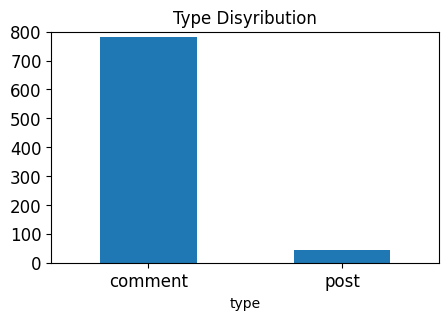

In [196]:
# 由 Dataframe 製圖
# 檢視 type 數量分佈

# 檢視數量
print(stock_df.type.value_counts())

# 繪圖
stock_df.type.value_counts().plot(kind= 'bar',
                                  ylim= (0, 800),
                                  title= "Type Disyribution",
                                  rot= 0, fontsize= 12 ,figsize= (5, 3))



#### <span style = "color:red"> practice execise 7</span>

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

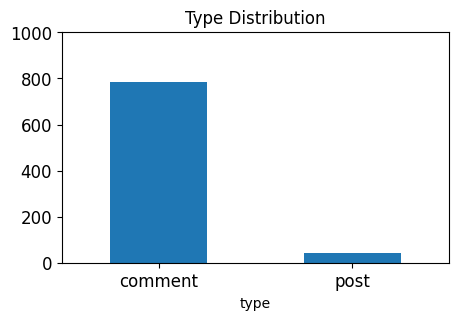

In [197]:
# practice 7: 調整 ylim 不要將上限寫死
stock_df.type.value_counts().plot(kind= 'bar',
                                  ylim= (0, stock_df.type.value_counts().max()+220),
                                  title= "Type Distribution",
                                  rot= 0, fontsize= 12 ,figsize= (5, 3))


#### <span style = "color:red"> practice execise 8</span>

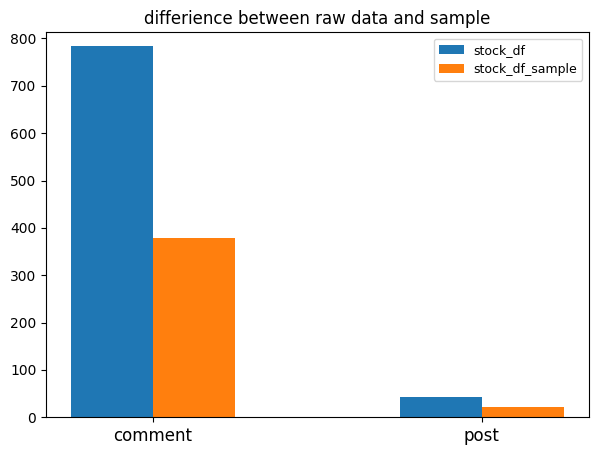

In [198]:
#practice 8: plot picture the betweem differience raw data and sample
import matplotlib.pyplot as plt


# 建立底圖
plt.figure(figsize=(7, 5))

#設定 y 軸參數
y_data = stock_df.type.value_counts()
y_data_sample = stock_df_sample.type.value_counts()

#設定 x 軸參數
category = stock_df["type"].unique()
x = np.arange(len(category))
plt.xticks(x,
           category,
           fontsize = 12,
           rotation = 0)

#條狀圖位置設定
width = 0.25
plt.bar(x-width/2, y_data, width=0.25, label = "stock_df")
plt.bar(x+width/2, y_data_sample, width=0.25, label = "stock_df_sample")

plt.ylim(0, max(y_data.max(), y_data_sample.max()) + 30)

#圖例
plt.legend(fontsize= 9)

#標題設定
plt.title("differience between raw data and sample")

#show the figure
plt.show()


#### 5.2 Feature creation

In [199]:
# use TA's function include nltk
stock_df["unigrams"] = stock_df["text"].apply(lambda x: dmh.tokenize_text(x))

# check
print(stock_df[0:4]["unigrams"])

# check columns
stock_df.columns # include new column

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object


Index(['type', 'title', 'author', 'upvotes', 'text', 'subjectivity',
       'polarity', 'sentiment', 'unigrams'],
      dtype='object')

In [200]:
# turn into list
#list(stock_df["unigrams"])

#### 5.3Feature subset selection

In [201]:
# use sklearn to tokenize, it's a difference way that using nltk

# create an object
count_vect = CountVectorizer()

# turn into token sparse matrix
stock_token_counts = count_vect.fit_transform(stock_df["text"])
print(stock_token_counts[3])


  (np.int32(0), np.int32(2742))	2
  (np.int32(0), np.int32(2051))	1
  (np.int32(0), np.int32(2343))	1
  (np.int32(0), np.int32(178))	4
  (np.int32(0), np.int32(2189))	2
  (np.int32(0), np.int32(3896))	8
  (np.int32(0), np.int32(2723))	4
  (np.int32(0), np.int32(4199))	3
  (np.int32(0), np.int32(2456))	3
  (np.int32(0), np.int32(3870))	3
  (np.int32(0), np.int32(2053))	3
  (np.int32(0), np.int32(2176))	3
  (np.int32(0), np.int32(3302))	1
  (np.int32(0), np.int32(4246))	2
  (np.int32(0), np.int32(3353))	1
  (np.int32(0), np.int32(3897))	2
  (np.int32(0), np.int32(868))	2
  (np.int32(0), np.int32(4330))	3
  (np.int32(0), np.int32(3478))	3
  (np.int32(0), np.int32(3982))	4
  (np.int32(0), np.int32(1861))	1
  (np.int32(0), np.int32(199))	1
  (np.int32(0), np.int32(4119))	1
  (np.int32(0), np.int32(569))	1
  (np.int32(0), np.int32(18))	3
  :	:
  (np.int32(0), np.int32(1081))	1
  (np.int32(0), np.int32(1325))	1
  (np.int32(0), np.int32(962))	1
  (np.int32(0), np.int32(3962))	2
  (np.int32(0),

In [202]:
# peek the token
count_vect.get_feature_names_out()[1542]

'fdx'

#### <span style = "color:red"> practice execise 9</span>

In [203]:
# practice exercise 9
# build an analyzer to clean unnecessary token and peek the word directly
analyze = count_vect.build_analyzer()
analyze(stock_df["text"][3])

['vision',
 'marine',
 'technologies',
 'inc',
 'is',
 'rewriting',
 'the',
 'watercraft',
 'rulebook',
 'their',
 'collaboration',
 'with',
 'shaun',
 'torrente',
 'has',
 'achieved',
 'the',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'on',
 'water',
 'this',
 'isn',
 'just',
 'about',
 'speed',
 'it',
 'about',
 'propelling',
 'electric',
 'boating',
 'into',
 'new',
 'era',
 'their',
 'cutting',
 'edge',
 'technology',
 'combined',
 'with',
 'torrente',
 'skill',
 'is',
 'making',
 'waves',
 'that',
 'll',
 'ripple',
 'for',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'inc',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'on',
 'water',
 'with',
 'shaun',
 'torrente',
 'the',
 'feat',
 'highlights',
 'the',
 'power',
 'of',
 'electric',
 'boating',
 'and',
 'pushes',
 'the',
 'limits',
 'of',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'and',
 'danfoss',
 'editron',
 'contribute',
 'to',
 

In [204]:
# comparison of anlayze and CountVectorizer()
print(f"analze: {analyze(stock_df['text'][0])}")

print("===================================================================================")
print(f"CountVectorizer():\n{stock_token_counts[0]}")


analze: ['calls', 'on', 'retards']
CountVectorizer():
  (np.int32(0), np.int32(701))	1
  (np.int32(0), np.int32(2742))	1
  (np.int32(0), np.int32(3287))	1


#### <span style = "color:red"> practice execise 10</span>

In [205]:
# practice exercise 10 

# convert sparse matrix to normal array, same to the Master we select top 5 record and top 100 tokens to analze
print(stock_token_counts[0:5, 0:100].toarray())

#由於沒有 1 的數量在我的資料中，故改找 3 
#找尋第 4 筆資料前 100 個特徵中有 3 的 index
forth_data = stock_token_counts[3 , 0:100].toarray().flatten() #使用 flatten method 將二維矩陣攤成一維

for i in range(1,len(forth_data)):
    if forth_data[i] == 3:
        print(f"There are 3 in index: {i}")

        #找出 index = 18 的詞彙，由上面教的 get_feature_names_out() 求出
        word = count_vect.get_feature_names_out()[i]
        print(f"That feature represents: '{word}'.")


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

#### <span style = "color:red"> practice execise 11</span>

(400, 2828)

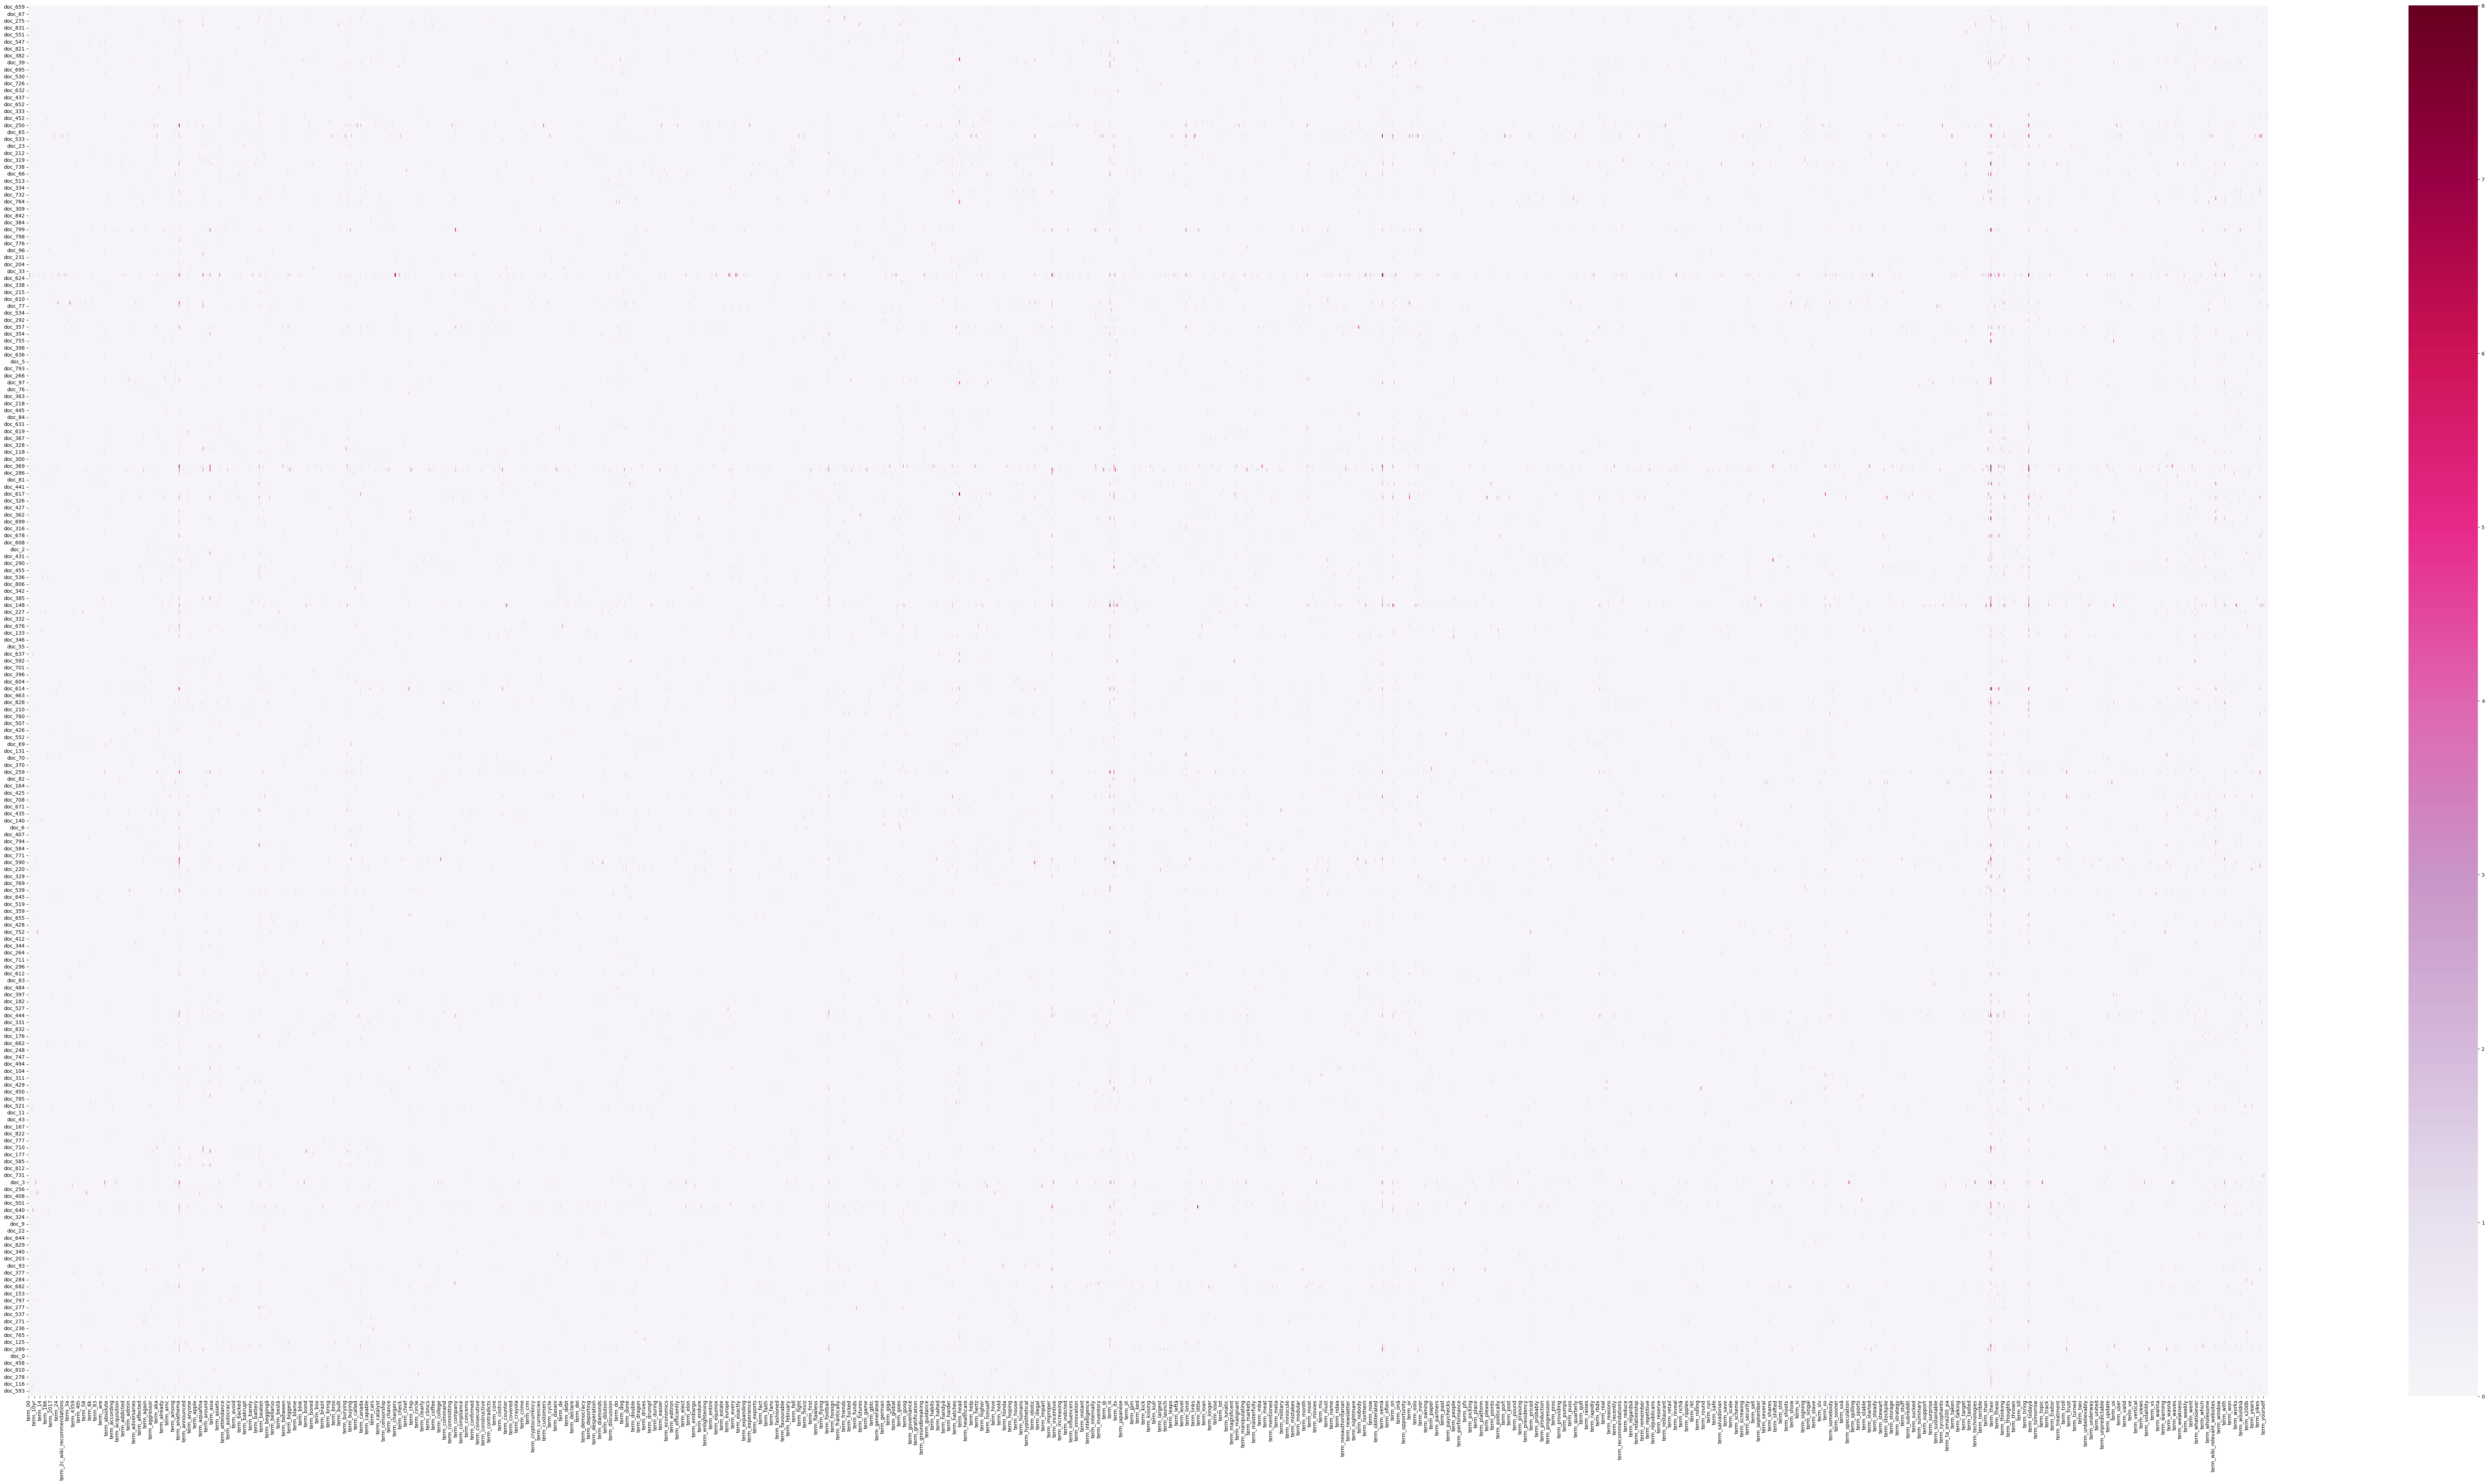

In [206]:
# practice exercise 11: plot the heatplot for sample n=400 term-document matrix.
"""the reason I prefer to do the sample but not entire matrix reason is down below
    因我們著重於觀察某些關鍵詞在這些論壇中出現的頻率，可使用 sample 的方式繪製熱圖，找出最常出現的詞彙
    若使用所有資訊會導致圖面過大難以識別，且運行時間長"""
import seaborn as sns

# build sample's sparse matrix
sample_for_hlt = count_vect.fit_transform(stock_df_sample["text"])
#print(sample_for_hlt)

# 設定 x,y 軸參數
plot_x_sample = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y_sample = ["doc_"+ str(i) for i in stock_df_sample.index]


# 匯入資料
plot_z_sample = sample_for_hlt.toarray()

# 建立圖表
df_todraw_sample = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
plt.subplots(figsize=(100, 50))
ax = sns.heatmap(df_todraw_sample,
                 cmap="PuRd",
                 vmin=0, vmax=8, annot=False)
df_todraw_sample.shape



#### 5.4.1 Transform Text Data


In [207]:
# 關鍵詞出現頻率，以 numpy 做計算
term_frequencies = np.asarray(stock_token_counts.sum(axis = 0))[0]

# check
print(term_frequencies[0])

4


C:\Users\user\AppData\Local\Temp\ipykernel_22500\185292749.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '08'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '1000'),
 Text(7, 0, '10yr'),
 Text(8, 0, '11'),
 Text(9, 0, '116'),
 Text(10, 0, '118'),
 Text(11, 0, '12'),
 Text(12, 0, '1242'),
 Text(13, 0, '125'),
 Text(14, 0, '14'),
 Text(15, 0, '140'),
 Text(16, 0, '14th'),
 Text(17, 0, '15'),
 Text(18, 0, '150'),
 Text(19, 0, '1700'),
 Text(20, 0, '17th'),
 Text(21, 0, '186'),
 Text(22, 0, '1934'),
 Text(23, 0, '1981'),
 Text(24, 0, '20'),
 Text(25, 0, '200'),
 Text(26, 0, '200k'),
 Text(27, 0, '2011'),
 Text(28, 0, '2017'),
 Text(29, 0, '2025'),
 Text(30, 0, '208'),
 Text(31, 0, '21'),
 Text(32, 0, '22'),
 Text(33, 0, '22rate'),
 Text(34, 0, '234'),
 Text(35, 0, '24'),
 Text(36, 0, '25'),
 Text(37, 0, '250'),
 Text(38, 0, '25k'),
 Text(39, 0, '27'),
 Text(40, 0, '28'),
 Text(41, 0, '2c_books'),
 Text(42, 0, '2c_wiki_recommendations'),
 Text(43, 0, '2fapps'),
 Text(44, 0, '2k'),
 Text(45, 0, '2nd'),
 Text(46, 0, '

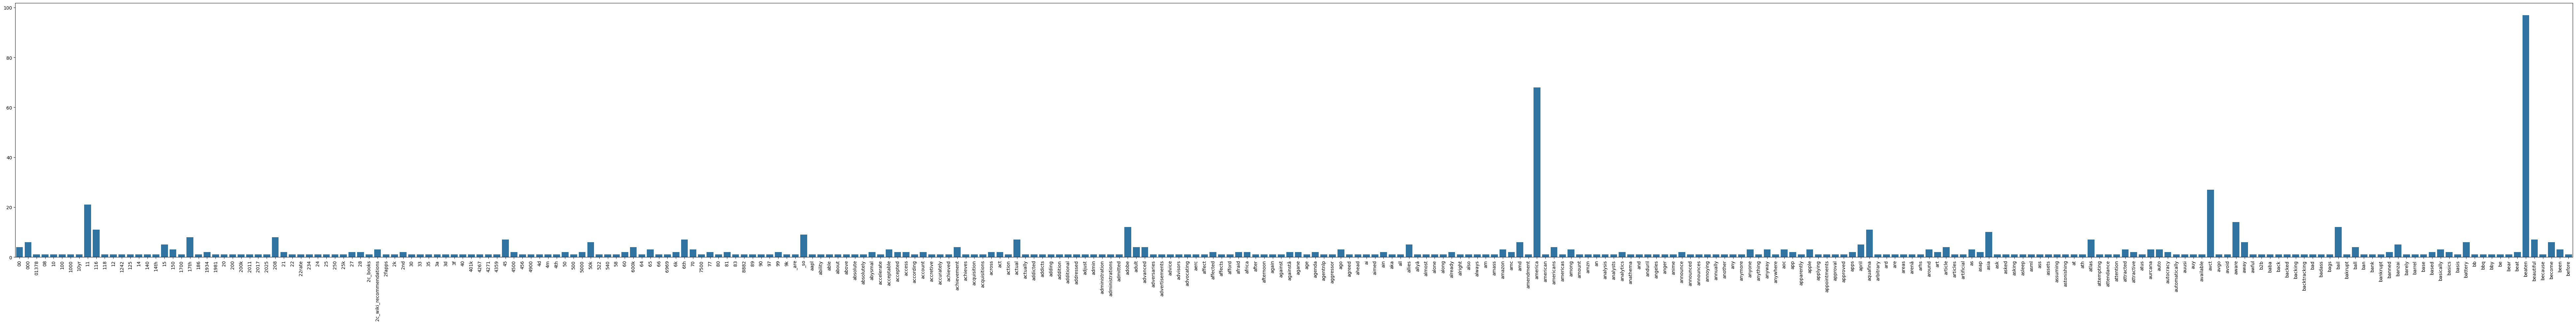

In [208]:
# use seaborn to plot terms frequencies figure
plt.subplots(figsize = (100,10))
fig_termfreqs_sns = sns.barplot(x= count_vect.get_feature_names_out()[0: 300],
                                y= term_frequencies[0: 300])
fig_termfreqs_sns.set_xticklabels(count_vect.get_feature_names_out()[0: 300], rotation = 90)

#### <span style = "color:red"> practice execise 12</span>

In [209]:
# practice 12: use plotly to build up a interactive visualization figure
# draw fisrt 300 terms figure
import plotly.express as px

#建立表格
x_terms = count_vect.get_feature_names_out()[:300]
y_freqs = term_frequencies[:300]
df_termfreqs_px = pd.DataFrame({"Term": x_terms, "Frequency": y_freqs})
print(df_termfreqs_px)

#使用 plotly tool 優化視覺效果
fig_termfreqs_px = px.bar(df_termfreqs_px, x= "Term", y= "Frequency",
                  title= "First 300 term-frequency figure")
fig_termfreqs_px.show()

          Term  Frequency
0           00          4
1          000          6
2        01378          1
3           08          1
4           10          1
..         ...        ...
295  beautiful          7
296    because          1
297     become          6
298       been          3
299     before          1

[300 rows x 2 columns]


#### <span style = "color:red"> practice execise 13</span>

In [210]:
# practice 13
# 依據關鍵詞出現頻率作排序
df_sorted = df_termfreqs_px.sort_values(by="Frequency", ascending= False)
display(df_sorted)

#取前 15 名
df_sorted_head = df_sorted.head(n = 15)

# 以seaborn 作圖
fig_of_top_fiftn_term = px.bar(df_sorted_head,
                               x= "Term", y= "Frequency",
                               title = "Top 15 frequency term figure"
                               )

fig_of_top_fiftn_term.show()


,Term,Frequency
294,beaten,97
178,america,68
257,avct,27
8,11,21
260,aware,14
...,...,...
4,10,1
296,because,1
3,08,1
2,01378,1


#### <span style = "color:red"> practice execise 14</span>

<Axes: xlabel='Term', ylabel='Frequency'>

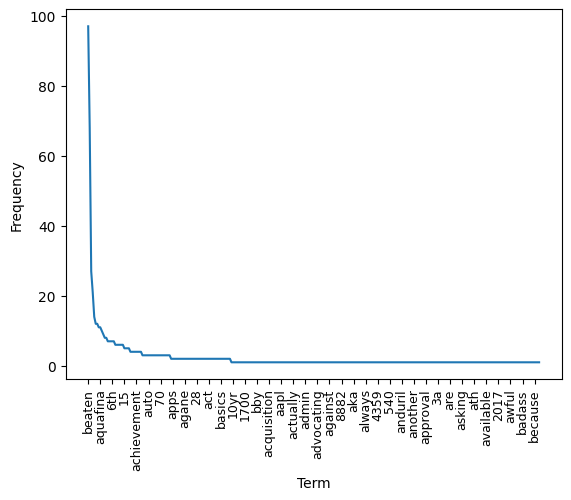

In [211]:
# practice 14
# 與 master 練習中相同，為了避免資料量過大造成運算困難，取前300筆資料做練習

# 由排序後表格繪圖
plt.plot(figsize = (12, 5))
fig_fortn = sns.lineplot(data= df_sorted, x= "Term", y= "Frequency")


# 取目前的 xticks 位置
xticks = plt.xticks()[0]  

# 每隔 5 個顯示一次標籤
plt.xticks(ticks= xticks[::8], 
           rotation= 90, 
           fontsize= 9)

fig_fortn

C:\Users\user\AppData\Local\Temp\ipykernel_22500\616734800.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<Axes: xlabel='Term', ylabel='Frequency'>

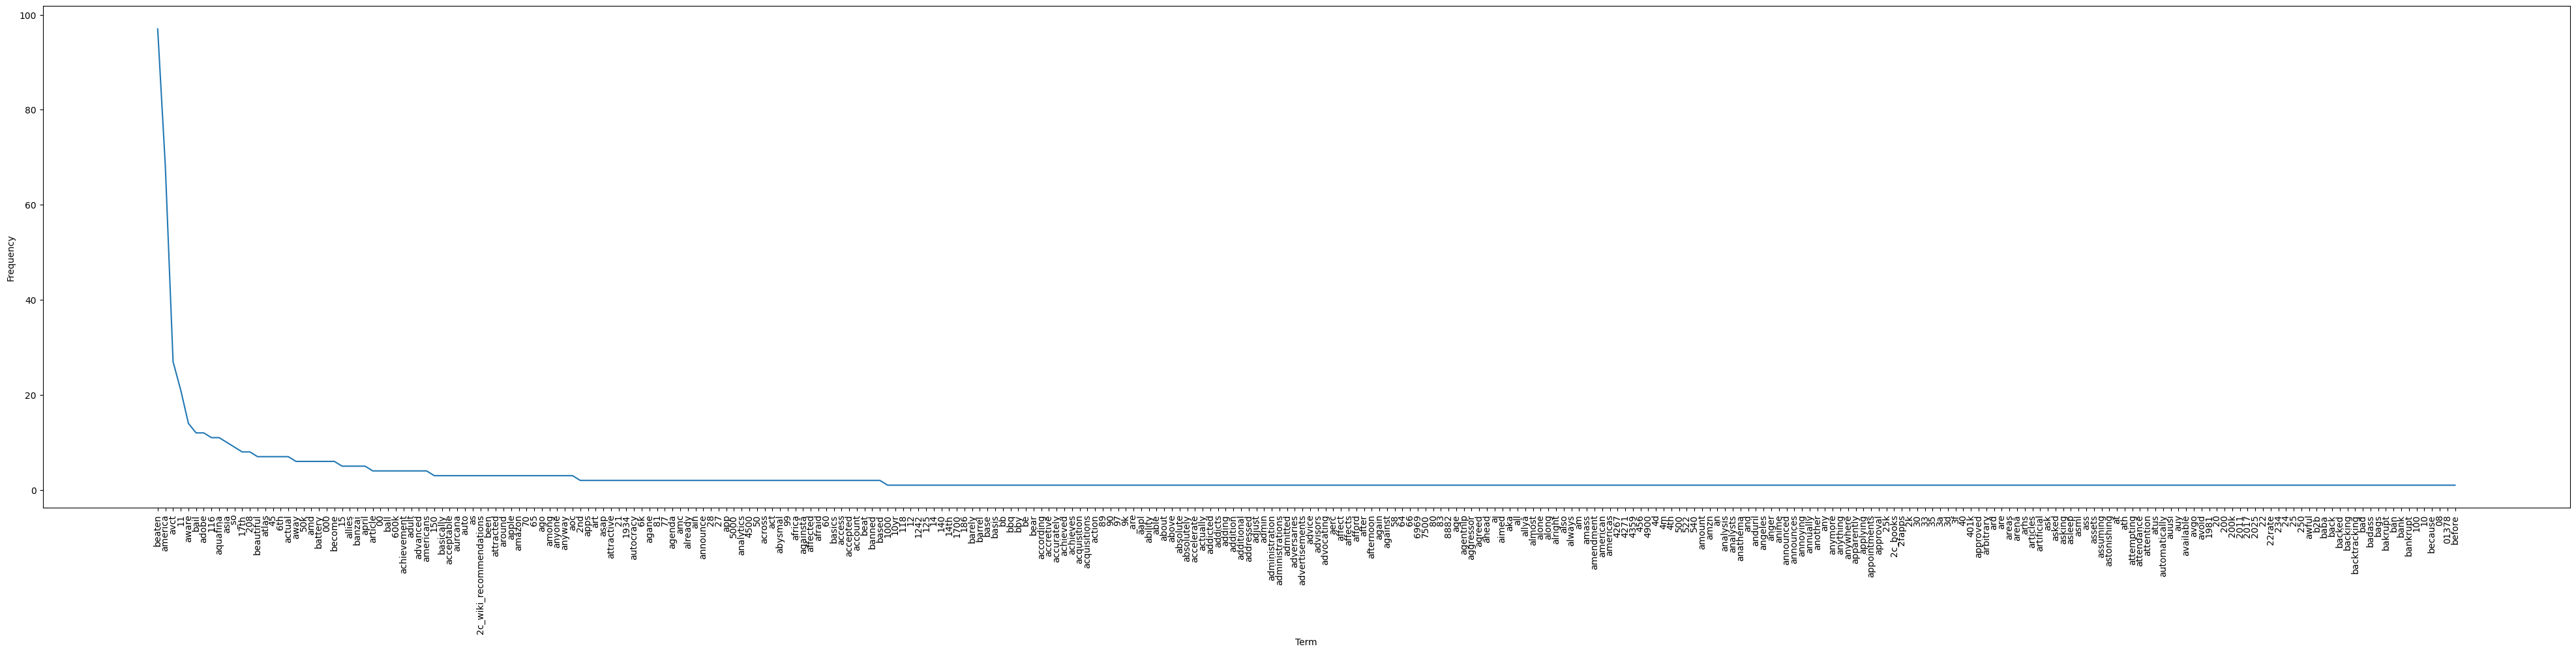

In [212]:
# 另一種畫法
# 由排序後表格繪圖
plt.subplots(figsize = (50, 10))
fig_fortn = sns.lineplot(data= df_sorted, x= "Term", y= "Frequency")

fig_fortn.set_xticklabels(df_sorted["Term"],
                          rotation = 90)

fig_fortn

#### <span style = "color:red"> practice execise 15</span>

,Term,Frequency
294,beaten,4.574711
178,america,4.219508
257,avct,3.295837
8,11,3.044522
260,aware,2.639057
...,...,...
4,10,0.000000
296,because,0.000000
3,08,0.000000
2,01378,0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_22500\1936985337.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<Axes: xlabel='Term', ylabel='Frequency'>

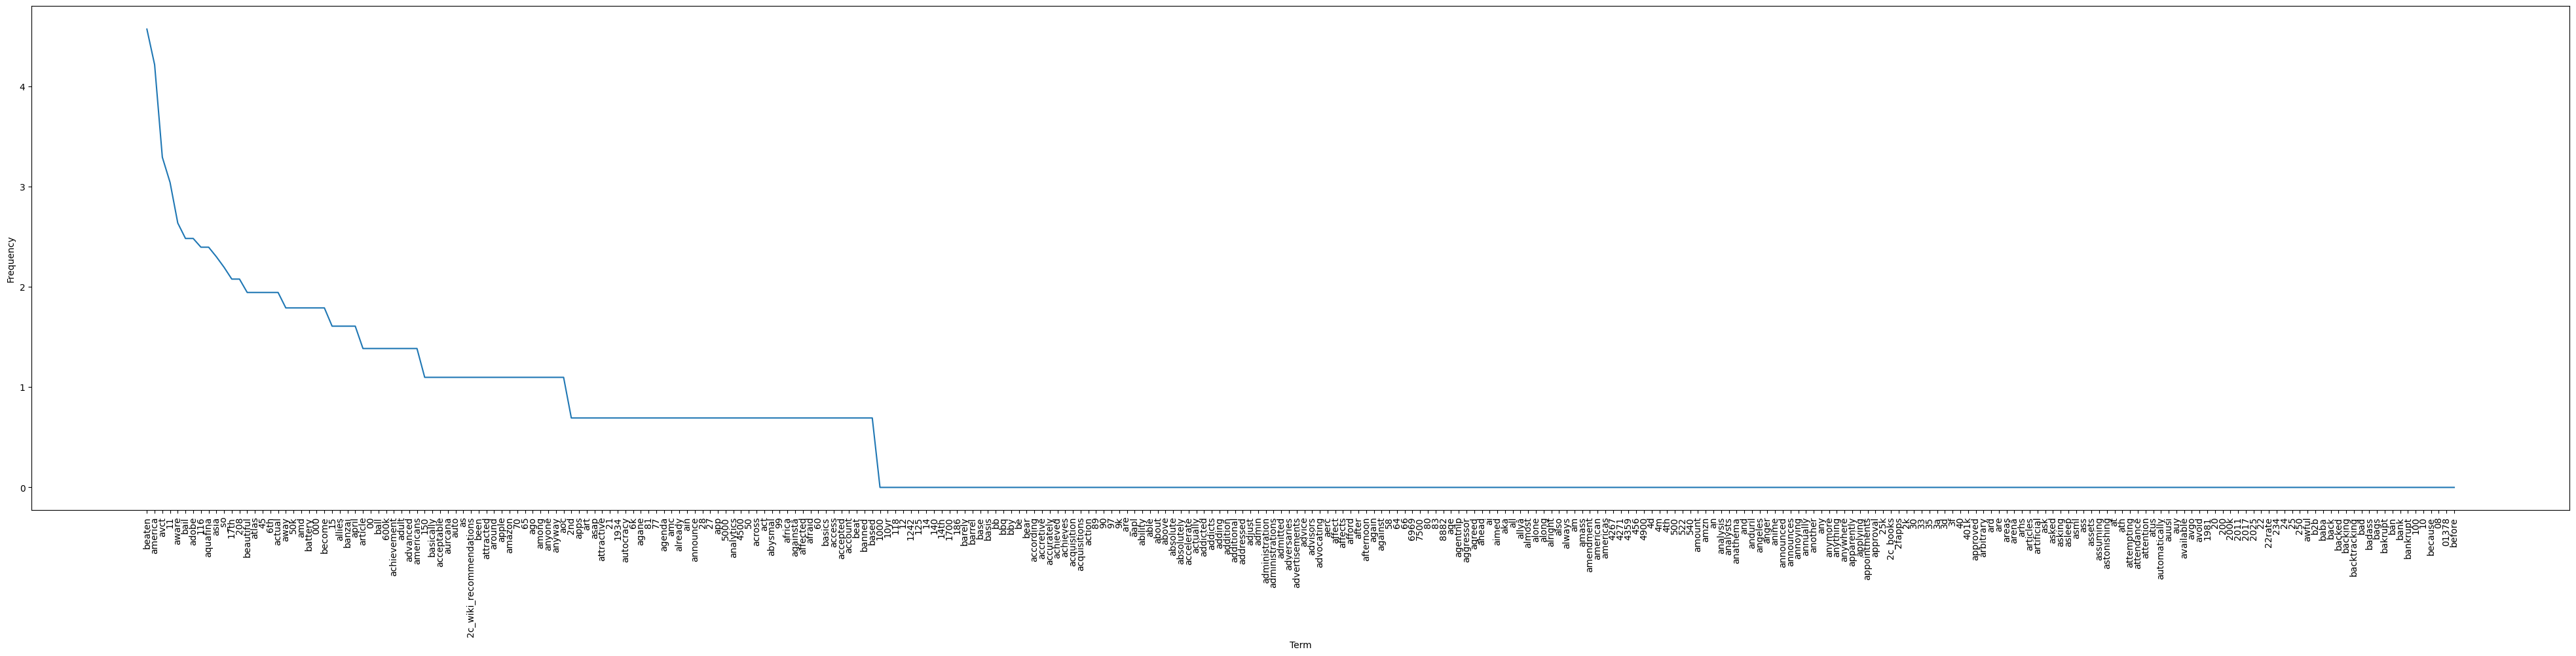

In [213]:
# practice 15
# Copy the code above
import math

# 對 Frequency 進行 log 運算
y_freqs_log = [math.log(i) for i in y_freqs]
#print(y_freqs_log)

df_freqs_log = pd.DataFrame({"Term" : x_terms, "Frequency" : y_freqs_log})

# 使用 value_sort function 進行出現頻率排序
df_sorted_freqs_log = df_freqs_log.sort_values(by= "Frequency", ascending= False)
display(df_sorted_freqs_log)

# 由排序後表格繪圖
plt.subplots(figsize = (50, 10))
fig_sorted_freqs_log = sns.lineplot(data= df_sorted_freqs_log, x= "Term", y= "Frequency")

# 微調圖表
fig_sorted_freqs_log.set_xticklabels(df_sorted_freqs_log["Term"],
                                     rotation = 90)

fig_sorted_freqs_log

#### Task 3: new data visualizations


,Term,Frequency
0,00,4
1,000,6
2,01378,1
3,08,1
4,10,1
...,...,...
295,beautiful,7
296,because,1
297,become,6
298,been,3


C:\Users\user\AppData\Local\Temp\ipykernel_22500\2022541256.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



<Axes: title={'center': 'Term frequency distribution'}, xlabel='Term', ylabel='Frequency'>

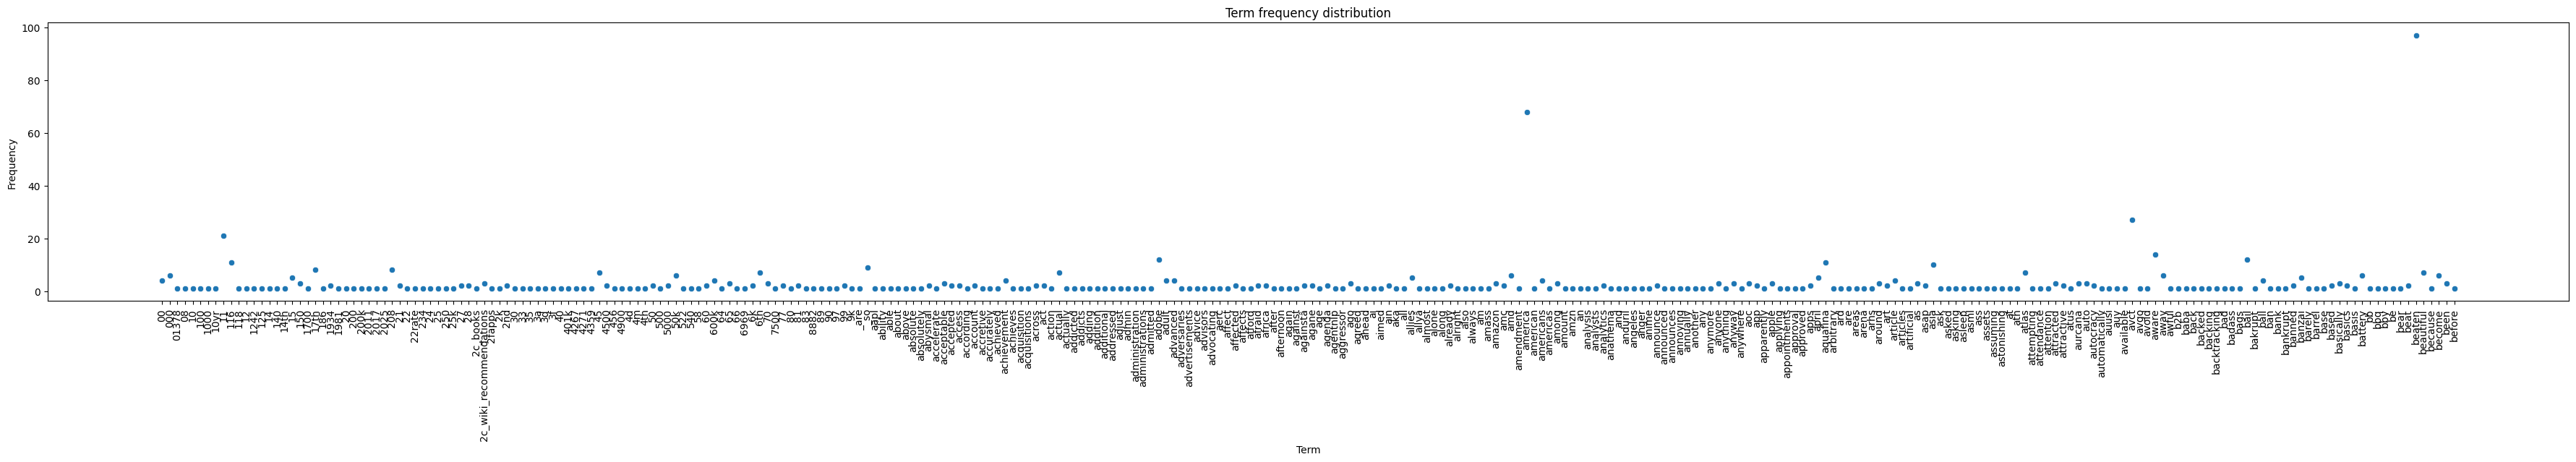

In [214]:
# 1.Using scatterplot to visualize term frequency distribution
# 設定底圖
plt.subplots(figsize=(45, 5))

# 使用前述 前 300 筆 的 term frequence datafraame 做繪圖
display(df_termfreqs_px)

#使用 seaborn 製圖
fig_scatter = sns.scatterplot(data = df_termfreqs_px,
                              x="Term", 
                              y="Frequency")
# 設定 x 軸標籤
fig_scatter.set_xticklabels(df_termfreqs_px["Term"],
                            rotation = 90)
# 設定標題
fig_scatter.set_title("Term frequency distribution")
fig_scatter

,type,title,author,upvotes,text,subjectivity,polarity,sentiment,unigrams
659,comment,How do you feel about a sitting president maki...,Mrtoyhead,1,If prison was acceptable for Martha Stewart th...,0.550000,0.350000,1.0,"[If, prison, was, acceptable, for, Martha, Ste..."
174,comment,Weekend Discussion Thread for the Weekend of A...,HiTechSoldierplus,8,I still cannot believe that I didn't sell the ...,0.000000,0.000000,0.0,"[I, still, can, not, believe, that, I, did, n'..."
67,comment,Someone post the hotline please.,Antique-Athlete-8838,1,Oh my gourd!,0.000000,0.000000,0.0,"[Oh, my, gourd, !]"
168,comment,r/Stocks Daily Discussion & Fundamentals Frida...,mazzaschi,1,The obvious can also be refreshing from CNBC: ...,0.750000,0.250000,1.0,"[The, obvious, can, also, be, refreshing, from..."
275,comment,Retail giant TARGET has now declined for 10 co...,ChristianLS,1,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"[Speak, for, yourself, ,, my, wife, is, being,..."
...,...,...,...,...,...,...,...,...,...
654,comment,"Trump is surrounded by a bunch of idiots, he s...",freddychuckles,1,And Miran. Them are the top two economic advis...,0.350000,0.350000,1.0,"[And, Miran, ., Them, are, the, top, two, econ..."
116,comment,r/Stocks Daily Discussion & Fundamentals Frida...,badasimo,4,RKT is a crazy stock in general. Every dividen...,0.443750,-0.200000,-1.0,"[RKT, is, a, crazy, stock, in, general, ., Eve..."
228,comment,Someone post the hotline please.,zeropoint71,1,Weâre also hiring at the dumpster behind Wen...,0.800000,0.100000,1.0,"[Weâre, also, hiring, at, the, dumpster, beh..."
593,comment,Is the market in complete denial right now?,Academic_District224,2,"Breaking news: US announces additional 7,000,0...",0.000000,0.000000,0.0,"[Breaking, news, :, US, announces, additional,..."


C:\Users\user\AppData\Local\Temp\ipykernel_22500\4009424955.py:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\user\AppData\Local\Temp\ipykernel_22500\4009424955.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



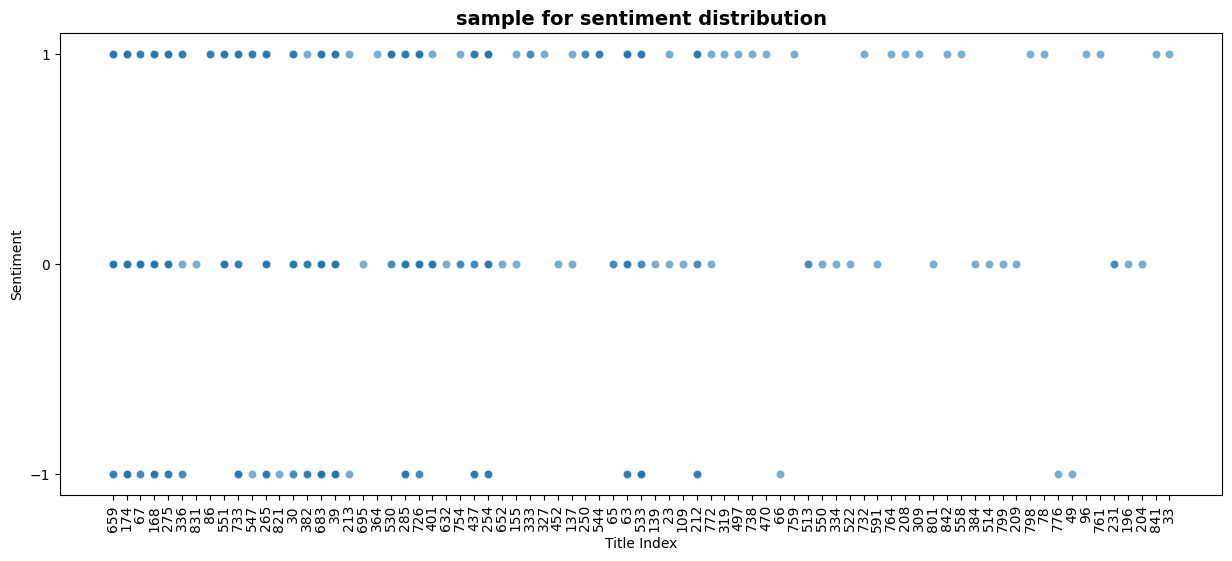

In [215]:
#取樣 400 筆資料做 sample for sentiment distribution
stock_df_sample = stock_df.sample(n = 400, random_state= 42)
display(stock_df_sample)

fig= plt.subplots(figsize=(15, 6))

fig= sns.scatterplot(data = stock_df_sample,
                     x="title",
                     y='sentiment',
                     alpha=0.6, #透明度調整
                     palette='viridis')#調色

#設定圖面名稱
fig.set_title("sample for sentiment distribution", fontsize=14, fontweight='bold')

# 修改 x 軸為 Title Index 放 Title 過長
fig.set_xlabel('Title Index')
fig.set_xticklabels(stock_df_sample["title"].index,
                    rotation = 90)

#設定 y 軸
fig.set_ylabel('Sentiment')
#因 sentiment 只有三種數字
fig.set_yticks([-1, 0, 1])



# Phase 2

In [216]:
### Begin Assignment Here 

###  5.4.2 Finding frequent patterns

In [217]:
#先確認一下資料內容
stock_df

,type,title,author,upvotes,text,subjectivity,polarity,sentiment,unigrams
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,1.000000,-0.900000,-1.0,"[Calls, on, retards]"
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,1,He didnât say thank you.,0.000000,0.000000,0.0,"[He, didnât, say, thank, you, .]"
...,...,...,...,...,...,...,...,...,...
841,comment,The Trump administration is begging Xi Jinping...,le_mihai,1,So countries âbegging to stop the tariffsâ...,0.000000,0.000000,0.0,"[So, countries, âbegging, to, stop, the, tar..."
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,"[Invest, now, it, is, going, to, shoot, up, to..."
843,comment,$ U.S. dollar value (crashing),lulububudu,2,Where can I read this?,0.000000,0.000000,0.0,"[Where, can, I, read, this, ?]"
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [218]:
# 建立一個以 sentiment 為目錄分類的詞頻矩陣
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 取出 sentiment index 作為 categories
sentiment_categories = stock_df["sentiment"].unique().astype(int)

# 依據 sentiment index 取出不同資料並創建各自表格
sentiment_categories_df = {} # sentiment index & stock dataframe dict
for sentiment_index in sentiment_categories:
    sentiment_categories_df[sentiment_index] = stock_df[stock_df["sentiment"] == sentiment_index].copy()

# create the function to let text dataframe turn into term freqs dataframe
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# sentiment index & term_document dict
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

# 依據 sentiment index -1, 0 , 1 建立其相對應的詞頻矩陣
for sentiment_index in sentiment_categories:
    filt_term_document_dfs[sentiment_index] = create_term_document_df(sentiment_categories_df[sentiment_index])


In [219]:
# 檢視 sentiment index =  -1.0 的詞頻矩陣 
sentiment_index_num = 0
print(f"Filtered Term-Document Frequency DataFrame for sentiment categories {sentiment_categories[sentiment_index_num]}:")
filt_term_document_dfs[sentiment_categories[sentiment_index_num]]

Filtered Term-Document Frequency DataFrame for sentiment categories -1:


,01378,027,10,100,100k,100x,11,12,125,13â,...,yikes,yippee,yo,you,your,yourselves,youtube,youâ,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# 檢視 sentiment index =  1.0 的詞頻矩陣 
sentiment_index_num = 1
print(f"Filtered Term-Document Frequency DataFrame for sentiment categories {sentiment_categories[sentiment_index_num]}:")
filt_term_document_dfs[sentiment_categories[sentiment_index_num]]

Filtered Term-Document Frequency DataFrame for sentiment categories 1:


,00,000,06,08,10,100,1000,10000,10k,10ks,...,young,your,yours,yourself,youâ,yoyo,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
# 檢視 sentiment index =  0.0 的詞頻矩陣 
sentiment_index_num = 2
print(f"Filtered Term-Document Frequency DataFrame for sentiment categories {sentiment_categories[sentiment_index_num]}:")
filt_term_document_dfs[sentiment_categories[sentiment_index_num]]

Filtered Term-Document Frequency DataFrame for sentiment categories 0:


,00,000,02,03,10,100,10yr,11,12,1242,...,years,yes,yesterday,yet,yields,yo,you,your,youâ,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[3 3 1 ... 1 1 1]


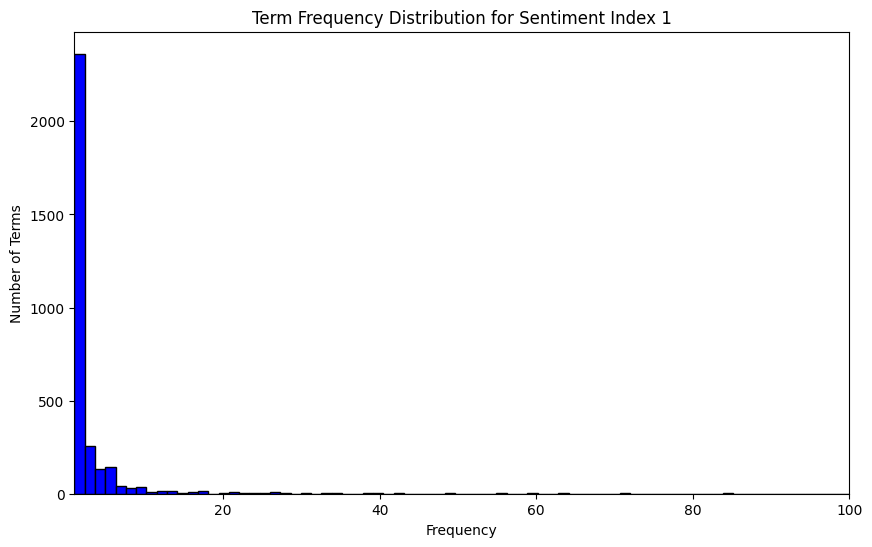

In [222]:
# 視覺化詞頻圖
# Sum over all documents to get total frequency for each word
sentiment_index_num = 1 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[sentiment_categories[sentiment_index_num]].sum(axis=0).to_numpy()
print(word_counts)
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=400, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment Index {sentiment_categories[sentiment_index_num]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 100)
plt.show()

#### 處理極端值


In [223]:
# 處理前 5% 高頻率出現詞彙
sentiment_index_num = 0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[sentiment_categories[sentiment_index_num]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment_categories[sentiment_index_num]].iloc[:, i].name for i in top_5_percent_indices]

print(f"sentiment_index: {sentiment_categories[sentiment_index_num]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


sentiment_index: -1
Number of terms in top 5%: 82
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'for', 'you', 'he', 'are', 'if', 'so', 'trump', 'on', 'be', 'they', 'will', 'but', 'as', 'not', 'with', 'just', 'us', 'have', 'like', 'at', 'what', 'all', 'his', 'was', 'about', 'my', 'think', 'can', 'people', 'now', 'or', 'an', 'even', 're', 'their', 'china', 'bad', 'when', 'has', 'going', 'no', 'tariffs', 'more', 'him', 'fuck', 'from', 'we', 'market', 'than', 'up', 'money', 'how', 'see', 'do', 'only', 'one', 'silver', 'out', 'by', 'go', 'itâ', 'why', 'there', 'down', 'still', 'long', 'me', 'time', 'economy', 'our', 'want', 'make', 'some']


In [224]:
# 處理後 1% 低頻率出現詞彙
sentiment_index_num = 0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[sentiment_categories[sentiment_index_num]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiment_categories[sentiment_index_num]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"sentiment_index: {sentiment_categories[sentiment_index_num]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


sentiment_index: -1
Number of terms in bottom 1%: 16
Filtered terms: ['4900', 'yippee', '16', '150', '14th', '140', '13â', '125', 'skills', 'yeah', 'sized', 'ya', 'yourselves', 'xeqt', 'wsb', '500']


In [225]:
# 將 高頻率 5% 及 低頻率 1% 的詞彙濾除
sentiment_index_num = 0  #You can change it from 0 to 2

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index #.index會取出欄的名稱，也就是term
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

# 建立經過過濾的 sentiment_index & term_document dict 
for sentiment_index in sentiment_categories:
    print(f'\nFor sentiment_index {sentiment_index} we filter the following words:')
    term_document_dfs[sentiment_index] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment_index])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Sentiment Index {sentiment_categories[sentiment_index_num]}:")
term_document_dfs[sentiment_categories[sentiment_index_num]]



For sentiment_index -1 we filter the following words:
Bottom 1.0% words: 
4900          1
yippee        1
16            1
150           1
14th          1
140           1
13â           1
125           1
skills        1
yeah          1
sized         1
ya            1
yourselves    1
xeqt          1
wsb           1
500           1
dtype: int64
Top 5.0% words: 
some         9
make         9
want         9
our          9
economy      9
          ... 
it          88
is         113
and        121
to         144
the        236
Length: 82, dtype: int64

For sentiment_index 1 we filter the following words:
Bottom 1.0% words: 
125          1
118          1
10ks         1
yall         1
yahoo        1
ww2          1
wrote        1
1974         1
1973         1
1969         1
1961         1
1953         1
1947         1
1945         1
msci         1
mr           1
200k         1
1k           1
1999         1
1992         1
1981         1
yippee       1
yesterday    1
zgld         1
186          1


,01378,027,10,100,100k,100x,11,12,15,1700,...,yesterday,yet,yields,yikes,yo,your,youtube,youâ,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Practice exercise 16

In [226]:
"""
相似處:
Top 5.0% words 在 3 個 Sentiment Index 中出現的詞非常相似，幾乎皆是連接詞(如: it, and, of, the, that etc...)
相異處:
Bottom 1.0% words 在 3 個 Sentiment Index 中出現的詞便非常不同，多以一串數字為主。

Top 5.0% words 觀察與 lab_1 Master 的練習中所得結論非常相似
Bottom 1.0% words 觀察便與 lab_1 Master 的練習中所得結論不同，主要是源自於 Master 的 data 來自於新聞，會出現地名或較少關注的專有名詞，而 Homework data
 源自於股票論壇，出現大量的數字亦屬相當合理
"""

'\n相似處:\nTop 5.0% words 在 3 個 Sentiment Index 中出現的詞非常相似，幾乎皆是連接詞(如: it, and, of, the, that etc...)\n相異處:\nBottom 1.0% words 在 3 個 Sentiment Index 中出現的詞便非常不同，多以一串數字為主。\n\nTop 5.0% words 觀察與 lab_1 Master 的練習中所得結論非常相似\nBottom 1.0% words 觀察便與 lab_1 Master 的練習中所得結論不同，主要是源自於 Master 的 data 來自於新聞，會出現地名或較少關注的專有名詞，而 Homework data\n 源自於股票論壇，出現大量的數字亦屬相當合理\n'

In [227]:
term_document_dfs

{np.int64(-1):      01378  027  10  100  100k  100x  11  12  15  1700  ...  yesterday  yet  \
 0        0    0   0    0     0     0   0   0   0     0  ...          0    0   
 1        0    0   0    0     0     0   0   0   0     0  ...          0    0   
 2        0    0   0    0     0     0   0   0   0     0  ...          0    0   
 3        0    0   0    0     0     0   0   0   0     0  ...          0    0   
 4        0    0   0    0     0     0   0   0   0     0  ...          0    0   
 ..     ...  ...  ..  ...   ...   ...  ..  ..  ..   ...  ...        ...  ...   
 192      0    0   0    0     0     0   0   0   0     0  ...          0    0   
 193      0    0   0    0     0     0   0   0   0     0  ...          0    0   
 194      0    0   0    0     0     0   0   0   0     0  ...          0    0   
 195      0    0   0    0     0     0   0   0   0     0  ...          0    0   
 196      0    0   0    0     0     0   0   0   0     0  ...          0    0   
 
      yields  yikes  yo 

#### Term Frequencies data transform into Transaction data

In [228]:
# encounter errors when running the subsequent codes due to UTF-8 encoding
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [229]:
from PAMI.extras.convert.DF2DB import DF2DB
      
# Loop through the dictionary of term-document DataFrames
for sentiment_index in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_index_safe = str(sentiment_index).replace('.', '_') # 修正 float to string 否則無法使用 replace function 
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[sentiment_index])            
    obj.convert2TransactionalDatabase(f'td_freq_db_sentiment_index_{sentiment_index_safe}.csv', '>=', 1)


Database size (total no of transactions) : 196
Number of items : 1558
Minimum Transaction Size : 1
Average Transaction Size : 13.096938775510203
Maximum Transaction Size : 66
Standard Deviation Transaction Size : 10.811737330248658
Variance in Transaction Sizes : 117.49311878597592
Sparsity : 0.9915937491813157


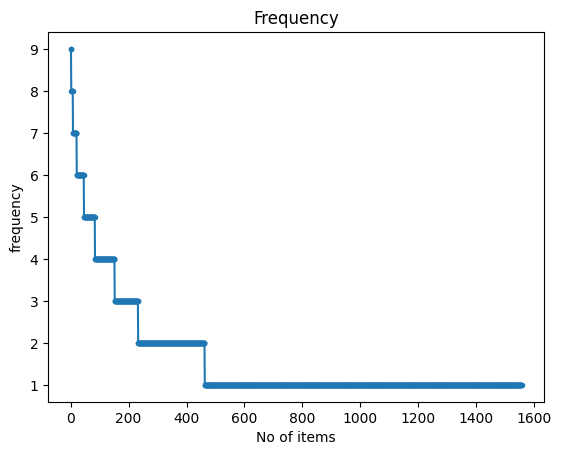

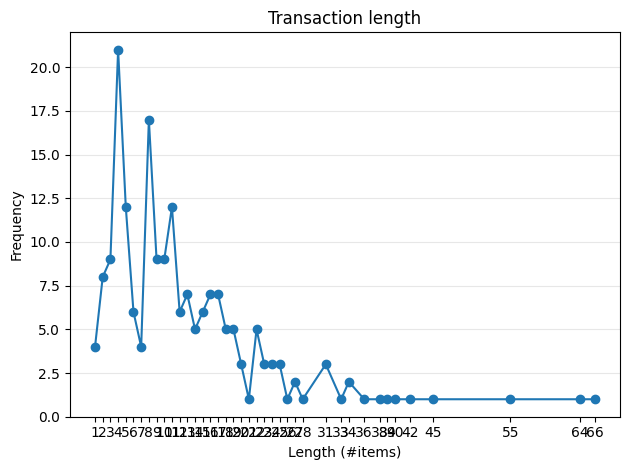

In [230]:
# 分析詞頻及交易長度 sentiment_index_-1
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase("td_freq_db_sentiment_index_-1.csv")
obj.run()
obj.printStats() #資料庫基本資料
obj.plotGraphs() #生成圖表

Database size (total no of transactions) : 314
Number of items : 2977
Minimum Transaction Size : 1
Average Transaction Size : 16.585987261146496
Maximum Transaction Size : 197
Standard Deviation Transaction Size : 22.346160440793795
Variance in Transaction Sizes : 500.946256689933
Sparsity : 0.9944286236946098


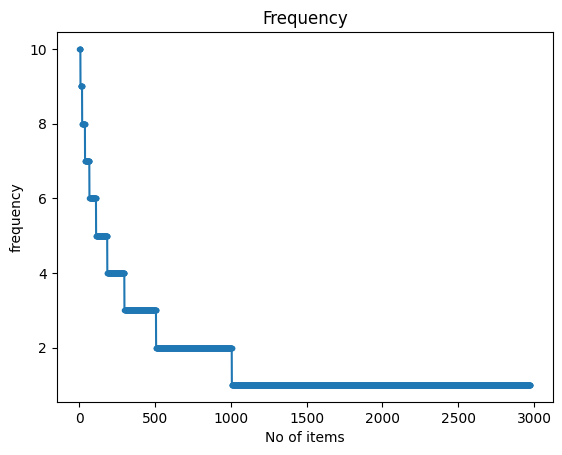

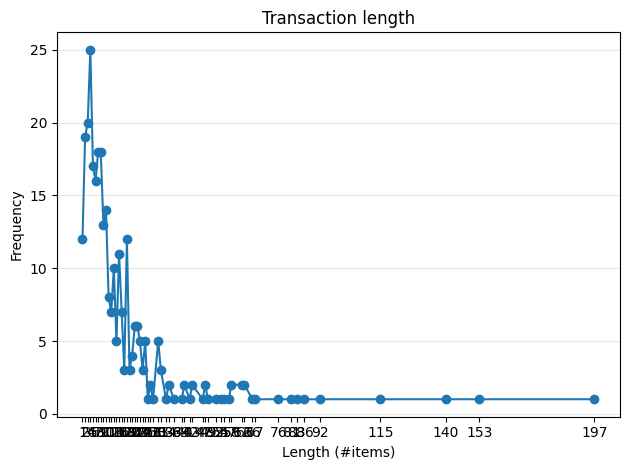

In [231]:
# 分析詞頻及交易長度 sentiment_index_1
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase("td_freq_db_sentiment_index_1.csv")
obj.run()
obj.printStats() #資料庫基本資料
obj.plotGraphs() #生成圖表

Database size (total no of transactions) : 306
Number of items : 1212
Minimum Transaction Size : 1
Average Transaction Size : 6.042483660130719
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.86028580899908
Variance in Transaction Sizes : 23.699828565305904
Sparsity : 0.9950144524256347


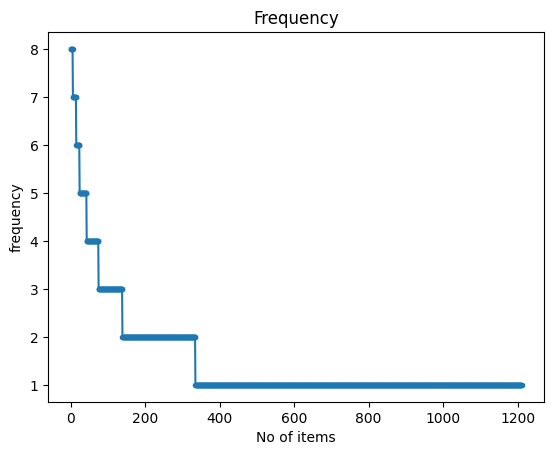

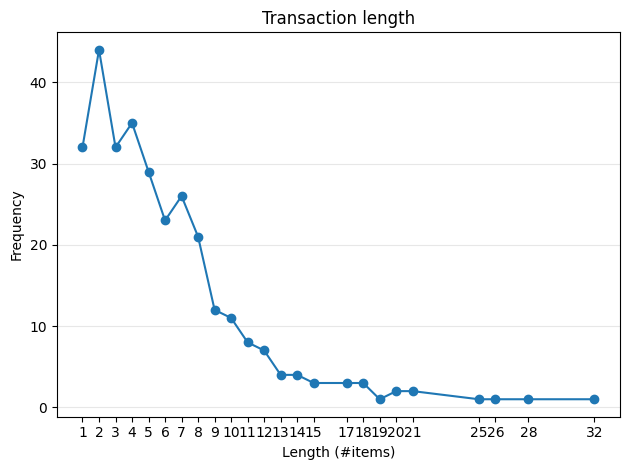

In [232]:
# 分析詞頻及交易長度 sentiment_index_0
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase("td_freq_db_sentiment_index_0.csv")
obj.run()
obj.printStats() #資料庫基本資料
obj.plotGraphs() #生成圖表

#### FPGrowth Algorithm Filt the data

In [233]:
# Use FPGrowth algorithm to deal with the transaction dataset
# 觀察 3 項 sentiment index transaction figureL MinSup = 6 可能是一個適當的值(由 sentiment index = -1 那張圖控制，transaction freqs 最小)
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup= 6
obj1 = alg.FPGrowth(iFile='td_freq_db_sentiment_index_-1.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_entiment_index_minus_one = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_entiment_index_minus_one))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 46
Runtime: 0.003042459487915039


In [234]:
frequentPatternsDF_entiment_index_minus_one

,Patterns,Support
0,retard,6
1,investment,6
2,seems,6
3,went,6
4,without,6
5,life,6
6,man,6
7,does,6
8,idiot,6
9,least,6


In [235]:
#obj1.save('frequentPatternsDF_sentiment_index_minus1_minSup6.txt')
#UnicodeEncodeError: 'cp950' codec can't encode character '\xe2' in position 3: illegal multibyte sequence


In [ ]:
# pattern 結果
patterns = obj1.getPatternsAsDataFrame()

# 手動調整 UTF-8 編碼後儲存
with open('frequentPatternsDF_sentiment_index_-1_minSup6.txt', 'w', encoding='utf-8') as f:
    for x, y in obj1._finalPatterns.items():
        line = "\t".join(x) + f":{y}\n"
        f.write(line)
""" 遇到 encoding 的問題
UnicodeEncodeError: 'cp950' codec can't encode character '\xe2' in position 3: illegal multibyte sequence
有跟在 TA's hour 詢問助教，主要原因可能是 data 內部有不在原始編碼的符號出現，導致這個問題
"""


" 遇到 encoding 的問題\nUnicodeEncodeError: 'cp950' codec can't encode character 'â' in position 3: illegal multibyte sequence\n"

In [237]:
# deal with sentiment index 1 transaction dataset
minSup= 6
obj2 = alg.FPGrowth(iFile='td_freq_db_sentiment_index_1.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_entiment_index_one = obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_entiment_index_one))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 110
Runtime: 0.008387327194213867


In [ ]:
# check the filted dataframe
frequentPatternsDF_entiment_index_one

,Patterns,Support
0,ever,6
1,months,6
2,best,6
3,donâ,6
4,end,6
...,...,...
105,someone,10
106,where,10
107,america,10
108,thanks,10


In [243]:
patterns = obj2.getPatternsAsDataFrame()

with open('frequentPatternsDF_sentiment_index_1_minSup6.txt', 'w', encoding='utf-8') as f:
    for x, y in obj2._finalPatterns.items():
        line = "\t".join(x) + f":{y}\n"
        f.write(line)

In [246]:
# deal with sentiment index 0 transaction dataset
minSup= 6
obj3 = alg.FPGrowth(iFile='td_freq_db_sentiment_index_0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_entiment_index_zero = obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_entiment_index_zero))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 24
Runtime: 0.0005769729614257812


In [244]:
frequentPatternsDF_entiment_index_zero

,Patterns,Support
0,call,6
1,news,6
2,re,6
3,anything,6
4,already,6
5,tariffs,6
6,out,6
7,thatâ,6
8,here,6
9,want,7


In [247]:
with open('frequentPatternsDF_sentiment_index_0_minSup6.txt', 'w', encoding='utf-8') as f:
    for x, y in obj3._finalPatterns.items():
        line = "\t".join(x) + f":{y}\n"
        f.write(line)

#### Filt Out Overlapping Patterns to classify differient sentiment index

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = []


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1} # 成為 set 
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df) #建立 category 對應經過濾後的 pattern 表格依序放入 list

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True) #透過 list 將 4 個表格合併

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False) #依據出現次數進行降冪排列

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

TypeError: 'int' object is not subscriptable